In [275]:
import lxml
import requests
from bs4 import BeautifulSoup
from time import sleep
import re
import csv

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Пробные тесты

In [ ]:
url = 'https://www.e-katalog.ru/list/298/'
r = requests.get(url)
r.text

'<!DOCTYPE html><html lang="ru"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width" data-no-mobile><title>&#9655; Купить ноутбуки с E-Katalog - цены интернет-магазинов России на ноутбуки - в Москве, Санкт-Петербурге</title><meta name="keywords" content="Ноутбуки, цены, где купить, рейтинг, интернет-магазины, магазины, отзывы, описания"><meta name="description" content="Где купить ноутбуки по лучшей цене? >>> E-Katalog.ru поможет подобрать! Более 1000 магазинов ✔ Сравнение цен и характеристики"><meta name="referrer" content="origin-when-cross-origin"><link rel="alternate" hreflang="ru-RU" href="https://www.e-katalog.ru/list/298/"><link rel="alternate" hreflang="ru-UA" href="https://ek.ua/list/298/"><link rel="alternate" hreflang="uk-UA" href="https://ek.ua/ua/list/298/"><link rel="alternate" hreflang="ru-KZ" href="https://kz.e-katalog.com/list/298/"><link rel="apple-touch-icon" href="/img/favicon/apple-touch-icon.png"><link rel="icon" type="image/png" sizes="3

In [ ]:
model = soup.find('div', class_='model-short-div list-item--goods-group ms-grp ').find('a', class_ ='no-u').find('span', class_='u').text #модель ноутбука
display = soup.find('div', class_='model-short-div list-item--goods-group ms-grp ').find('ul', class_ ='conf-key-prop clearfix').findAll('li')[0].text #диагональ, разрешение
soup.find('div', class_='model-short-div list-item--goods-group ms-grp ').find('ul', class_ ='conf-key-prop clearfix').findAll('li')[1].text
soup.find('div', class_='model-short-div list-item--goods-group ms-grp ').find('ul', class_ ='conf-key-prop clearfix').findAll('li')[2].text
soup.find('div', class_='model-short-div list-item--goods-group ms-grp ').find('ul', class_ ='conf-key-prop clearfix').findAll('li')[3].text

'вес 1.29\xa0кг'

In [ ]:
soup.find('div', class_='model-short-div list-item--goods-group ms-grp ').find('div', class_ ='model-short-description').get('data-descr') #тест

'дисплей 13.3\xa0", 2560x1600 (16:10)\xa0 , процессор , Apple, M1, ОЗУ 8 / 16\xa0ГБ, вес 1.29\xa0кг'

In [ ]:
soup.find('div', class_='model-short-div list-item--goods-group ms-grp ').find('ul', class_ ='conf-key-prop clearfix').findAll('li')[0].text #тест

'дисплей 13.3\xa0", 2560x1600 (16:10)\xa0 '

In [ ]:
url = 'https://www.e-katalog.ru/list/298/'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')

df = pd.DataFrame(columns=['Model','Display','Variant','ProcessorSeries','RAM','DiskType', 'DiskSize','2DiskSize', 'ProcessorModel', 'GPU', 'Price'])
list1=[]
list2=[]
list3=[]
laptops = soup.findAll('div', class_='model-short-div list-item--goods-group ms-grp ')
model = laptops[0].find('table', class_ ='model-short-block').find('td',class_='model-short-info').find('td', class_='model-conf-title').find('a',class_='no-u').find('span', class_='u').text #модель ноутбука
display = laptops[0].find('ul', class_ ='conf-key-prop clearfix').findAll('li')[0].text #диагональ, разрешение
variants = laptops[0].find('table', class_='model-short-block').find('div', class_='conf-div-short').find('table', class_='conf-table').findAll('tr', class_='conf-tr')
specifications1 = variants[0].findAll('td', class_='conf-td c21')
specifications2 = variants[0].findAll('td', class_='conf-td c21 conf-td__hide')
prices = variants[0].findAll('span', class_='price-int') #цена
list3.append(model)
list3.append(display)
for spec1 in specifications1:
  p1=spec1.text
  p1=p1.replace('\n','')
  list1.append(p1)
for spec2 in specifications2:
  p2=spec2.text
  list2.append(p2)
for price in prices:
  p3=price.text
  list2.append(p3)
  print(p3)
#print(list1)
print(list2)
#list3=[i for i in list3 if i != 0]

flist=list3+list1+list2
print(len(list3))
a_series = pd.Series(flist, index = df.columns)
df = df.append(a_series, ignore_index=True)
print(df.head())

79 480 .. 118 636 р.
['M1\xa0', 'M1 7-Core\xa0', '79\xa0480\xa0.. 118\xa0636\xa0р.']
2
                  Model                              Display Variant  \
0  Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     MGND3   

  ProcessorSeries   RAM  ... DiskSize 2DiskSize ProcessorModel         GPU  \
0          Apple   8 ГБ  ...   256 ГБ                      M1   M1 7-Core    

                  Price  
0  79 480 .. 118 636 р.  

[1 rows x 11 columns]


In [ ]:
print(df.head())

                  Model                              Display Variant  \
0  Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     MGND3   

  ProcessorSeries   RAM  ... DiskSize 2DiskSize ProcessorModel         GPU  \
0          Apple   8 ГБ  ...   256 ГБ                      M1   M1 7-Core    

                  Price  
0  79 480 .. 118 636 р.  

[1 rows x 11 columns]


In [ ]:
for laptop in laptops:
  model = laptop.find('table', class_ ='model-short-block').find('td',class_='model-short-info').find('td', class_='model-conf-title').find('a',class_='no-u').find('span', class_='u').text #модель ноутбука
  print(model)
  display = laptop.find('ul', class_ ='conf-key-prop clearfix').findAll('li')[0].text #диагональ, разрешение


Apple MacBook Air 13
Apple MacBook Pro 14
Lenovo Legion 5 Pro 16ACH6H
Lenovo IdeaPad Gaming 3 15ACH6
Lenovo Legion 5 17ACH6H
Lenovo IdeaPad 5 Pro 16ACH6
Honor MagicBook 14
MSI GP76 Leopard 11UG
Lenovo IdeaPad 3 14ALC6
Asus A571GT
Acer Nitro 5 AN515-57
Honor MagicBook 15
HP 255 G8
Huawei MateBook D 16
MSI Sword 15 A11UE
MSI GF63 Thin 11UC
Lenovo IdeaPad 3 17ALC6
Apple MacBook Pro 16
Asus Vivobook Pro 15 OLED K3500PH
MSI Pulse GL76 11UEK
MSI GF65 Thin 10UE
Lenovo Legion 5 Pro 16ITH6H
Dell G15 5515
Apple MacBook Pro 13


In [ ]:
laptops = soup.findAll('div', class_='model-short-div list-item--goods-group ms-grp ')
len(laptops)

24

In [ ]:
len(specifications2)
#len(variants)

2

In [ ]:
for variant in variants:
  spec = variant.findAll(class_='conf-td c21')

In [ ]:
soup = BeautifulSoup(r.text, 'lxml')

# Парсинг

In [ ]:
df = pd.DataFrame(columns=['Model','Display','Variant','CPUSeries','RAM','DiskType', 'DiskSize','2DiskSize', 'CPUModel', 'GPU', 'Price'])
list1=[]
list2=[]
list3=[]
try:
  for p in range(0, 64):
    print(p)
    url = f'https://www.e-katalog.ru/list/298/{p}/'
    r = requests.get(url)
    sleep(2)
    soup = BeautifulSoup(r.text, 'lxml')
    laptops = soup.findAll('div', class_='model-short-div list-item--goods-group ms-grp ') #основной код получения спецификаций
    for laptop in laptops:
      model = laptop.find('table', class_ ='model-short-block').find('td',class_='model-short-info').find('td', class_='model-conf-title').find('a',class_='no-u').find('span', class_='u').text #модель ноутбука
      display = laptop.find('ul', class_ ='conf-key-prop clearfix').findAll('li')[0].text #диагональ, разрешение
      variants = laptop.find('table', class_='model-short-block').find('div', class_='conf-div-short').find('table', class_='conf-table').findAll('tr', class_='conf-tr') #вариации ноутбука
      list3.clear()
      list3.append(model)
      list3.append(display)
      #print(len(variants))
      for variant in variants:
        specifications1 = variant.findAll('td', class_='conf-td c21')
        specifications2 = variant.findAll('td', class_='conf-td c21 conf-td__hide')
        prices = variant.findAll('span', class_='price-int') #цена
        for spec1 in specifications1:      
          p1=spec1.text
          p1=p1.replace('\n','')
          list1.append(p1)
        for spec2 in specifications2:
          p2=spec2.text
          list2.append(p2)
        for price in prices:
          p3=price.text
          list2.append(p3)
        flist.clear()
        if(list1 and list2 and list3):
          flist=list3+list1+list2
          #print(list1)
          #print(list2)
          a_series = pd.Series(flist, index = df.columns)
          df = df.append(a_series, ignore_index=True)
        list1.clear()
        list2.clear() 
except:
    pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [ ]:
df.head()

,Model,Display,Variant,CPUSeries,RAM,...,DiskSize,2DiskSize,CPUModel,GPU,Price
0,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",MGND3,Apple,8 ГБ,...,256 ГБ,,M1,M1 7-Core,79 480 .. 118 636 р.
1,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",MGN63,Apple,8 ГБ,...,256 ГБ,,M1,M1 7-Core,80 000 .. 105 000 р.
2,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",MGN93,Apple,8 ГБ,...,256 ГБ,,M1,M1 7-Core,80 900 .. 118 636 р.
3,Apple MacBook Pro 14,"дисплей 14.2 "", 3024x1964",Z15H/8,Apple,32 ГБ,...,1024 ГБ,,M1 Max,M1 Max 24-Core,263 723 .. 294 990 р.
4,Apple MacBook Pro 14,"дисплей 14.2 "", 3024x1964",Z15K/8,Apple,32 ГБ,...,1024 ГБ,,M1 Max,M1 Max 24-Core,263 723 .. 310 990 р.


In [ ]:
df.shape

(4579, 11)

In [ ]:
df.info

<bound method DataFrame.info of                                Model                              Display  \
0               Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     
1               Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     
2               Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     
3               Apple MacBook Pro 14          дисплей 14.2 ", 3024x1964     
4               Apple MacBook Pro 14          дисплей 14.2 ", 3024x1964     
...                              ...                                  ...   
4574                  Lenovo V510 14     дисплей 14 ", 1920x1080 (16:9)     
4575            HP EliteBook 1040 G4     дисплей 14 ", 3840x2160 (16:9)     
4576  Lenovo ThinkPad X1 Carbon Gen5     дисплей 14 ", 1920x1080 (16:9)     
4577               Acer One 10 S1002   дисплей 10.1 ", 1280x800 (16:10)     
4578            Asus ZenBook UX305CA   дисплей 13.3 ", 1920x1080 (16:9)     

         Variant CPUSeries    RAM  ... Disk

In [ ]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 11)
print(df)

                               Model                              Display  \
0               Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     
1               Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     
2               Apple MacBook Air 13  дисплей 13.3 ", 2560x1600 (16:10)     
3               Apple MacBook Pro 14          дисплей 14.2 ", 3024x1964     
4               Apple MacBook Pro 14          дисплей 14.2 ", 3024x1964     
...                              ...                                  ...   
4574                  Lenovo V510 14     дисплей 14 ", 1920x1080 (16:9)     
4575            HP EliteBook 1040 G4     дисплей 14 ", 3840x2160 (16:9)     
4576  Lenovo ThinkPad X1 Carbon Gen5     дисплей 14 ", 1920x1080 (16:9)     
4577               Acer One 10 S1002   дисплей 10.1 ", 1280x800 (16:10)     
4578            Asus ZenBook UX305CA   дисплей 13.3 ", 1920x1080 (16:9)     

         Variant CPUSeries    RAM  DiskType DiskSize 2DiskSize  CPUModel  \

In [ ]:
df.to_csv('notebooks.csv')

# Подготовка данных

In [383]:
import os
os.chdir("/content/drive/MyDrive/data_files")
df1 = pd.read_csv("notebooks.csv")
del df1['Unnamed: 0']
del df1['Variant']

In [384]:
df1[:10]

,Model,Display,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Price
0,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",Apple,8 ГБ,SSD,256 ГБ,,M1,M1 7-Core,79 480 .. 118 636 р.
1,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",Apple,8 ГБ,SSD,256 ГБ,,M1,M1 7-Core,80 000 .. 105 000 р.
2,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",Apple,8 ГБ,SSD,256 ГБ,,M1,M1 7-Core,80 900 .. 118 636 р.
3,Apple MacBook Pro 14,"дисплей 14.2 "", 3024x1964",Apple,32 ГБ,SSD,1024 ГБ,,M1 Max,M1 Max 24-Core,263 723 .. 294 990 р.
4,Apple MacBook Pro 14,"дисплей 14.2 "", 3024x1964",Apple,32 ГБ,SSD,1024 ГБ,,M1 Max,M1 Max 24-Core,263 723 .. 310 990 р.
5,Apple MacBook Pro 14,"дисплей 14.2 "", 3024x1964",Apple,32 ГБ,SSD,512 ГБ,,M1 Max,M1 Max 24-Core,268 999 р.
6,Lenovo Legion 5 Pro 16ACH6H,"дисплей 16 "", 2560x1600 (16:10)",Ryzen 5,16 ГБ,SSD M.2,512 ГБ,,5600H,RTX 3060,119 990 .. 162 818 р.
7,Lenovo Legion 5 Pro 16ACH6H,"дисплей 16 "", 2560x1600 (16:10)",Ryzen 5,16 ГБ,SSD M.2,1024 ГБ,,5600H,RTX 3060,123 990 .. 167 727 р.
8,Lenovo Legion 5 Pro 16ACH6H,"дисплей 16 "", 2560x1600 (16:10)",Ryzen 5,16 ГБ,SSD M.2,512 ГБ,,5600H,RTX 3060,125 990 .. 171 818 р.
9,Lenovo Legion 5 Pro 16ACH6H,"дисплей 16 "", 2560x1600 (16:10)",Ryzen 5,16 ГБ,SSD M.2,1024 ГБ,,5600H,RTX 3060,126 990 р.


In [385]:
df1 = df1.replace('\n', '', regex = True)

dfRep=pd.DataFrame(columns=['RAM']) #убрать ГБ у RAM
for i in df1['RAM']:
  s = i.replace('ГБ', '')
  s = str(s)
  s = re.sub('[^0-9]','', s)
  a_series = pd.Series(s, index = dfRep.columns)
  dfRep = dfRep.append(a_series, ignore_index=True)
df1['RAM']=dfRep['RAM']

dfRep=pd.DataFrame(columns=['DiskSize']) #убрать ГБ у DiskSize и убрать нечисловые строки
for i in df1['DiskSize']:
  s = re.sub('[^0-9]','', i)
  a_series = pd.Series(s, index = dfRep.columns)
  dfRep = dfRep.append(a_series, ignore_index=True)
df1['DiskSize']=dfRep['DiskSize']

dfRep=pd.DataFrame(columns=['2DiskSize']) #убрать ГБ у 2DiskSize и заменить пустоты на 0
for i in df1['2DiskSize']:
  s = re.sub('[^0-9]','', i)
  s = s.strip()  
  if s.isdigit():
    s=s
  else:
    s=0
  a_series = pd.Series(s, index = dfRep.columns)
  dfRep = dfRep.append(a_series, ignore_index=True)
df1['2DiskSize']=dfRep['2DiskSize']

In [386]:
df1.head()

,Model,Display,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Price
0,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",Apple,8,SSD,256,0,M1,M1 7-Core,79 480 .. 118 636 р.
1,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",Apple,8,SSD,256,0,M1,M1 7-Core,80 000 .. 105 000 р.
2,Apple MacBook Air 13,"дисплей 13.3 "", 2560x1600 (16:10)",Apple,8,SSD,256,0,M1,M1 7-Core,80 900 .. 118 636 р.
3,Apple MacBook Pro 14,"дисплей 14.2 "", 3024x1964",Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,263 723 .. 294 990 р.
4,Apple MacBook Pro 14,"дисплей 14.2 "", 3024x1964",Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,263 723 .. 310 990 р.


In [387]:
df1.shape

(4579, 10)

In [388]:
listDiag=[]
listRes=[]
for i in df1['Display']: #разделение стобца Display
  a = str(i)  
  if(',' not in a):
    listDiag.append(a)
    listRes.append(a)
  else: 
    listP = a.split(',')
    d = listP[0]
    d = d.replace('дисплей','')
    d = d.replace('"','')
    d = d.replace('\xa0','')
    d = d.replace(' - / ', '')
    d = float(d)
    listDiag.append(d)
    listRes.append(listP[1])
df1['Diagonal']=listDiag
df1['Resolution']=listRes
del df1['Display']

In [389]:
listMidP=[]
df1.dropna()
for i in df1['Price']: #вычисление средней цены и убирание нулей
  a = str(i)  
  if('..' not in a):
    p=re.sub('[^0-9]','', a)
    if p.isdigit():
      listMidP.append(p)
    else:
      listMidP.append(0)
  else: 
    listP = a.split('..')
    p1 = int(re.sub('[^0-9]','', listP[0]))
    p2 = int(re.sub('[^0-9]','', listP[1]))
    mid = statistics.mean([p1, p2])
    listMidP.append(mid)
df1['MiddlePrice']=listMidP
del df1['Price']
index_names = df1[ df1['MiddlePrice'] == 0 ].index
df1.drop(index_names, inplace = True)

In [390]:
listType=[]
for i in df1['DiskType']:
  a = str(i)
  a = a.replace('\xa0', '')
  a = a.replace(',', '')
  a = a.strip() 
  listType.append(a)
df1['DiskType']=listType
index_names = df1[ df1['DiskType'] == '4ГБ' ].index
df1.drop(index_names, inplace = True)

In [391]:
df1.head()

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99058
1,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),92500
2,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99768
3,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,279356
4,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,287356


In [392]:
df1.shape

(4449, 11)

In [393]:
df1['Model'] = df1['Model'].astype('category')
df1['CPUSeries'] = df1['CPUSeries'].astype('category')
df1['RAM'] = df1['RAM'].astype('int64')
df1['DiskType'] = df1['DiskType'].astype('category')
df1['DiskSize'] = df1['DiskSize'].astype('int64')
df1['2DiskSize'] = df1['2DiskSize'].astype('int64')
df1['CPUModel'] = df1['CPUModel'].astype('category')
df1['GPU'] = df1['GPU'].astype('category')
df1['Diagonal'] = df1['Diagonal'].astype('float64')
df1['Resolution'] = df1['Resolution'].astype('str')
df1['MiddlePrice'] = df1['MiddlePrice'].astype('float64')

In [394]:
df1.dtypes

Model          category
CPUSeries      category
RAM               int64
DiskType       category
DiskSize          int64
2DiskSize         int64
CPUModel       category
GPU            category
Diagonal        float64
Resolution       object
MiddlePrice     float64
dtype: object

In [395]:
df1[:25]

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99058.0
1,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),92500.0
2,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99768.0
3,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,279356.5
4,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,287356.5
5,Apple MacBook Pro 14,Apple,32,SSD,512,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,268999.0
6,Lenovo Legion 5 Pro 16ACH6H,Ryzen 5,16,SSD M.2,512,0,5600H,RTX 3060,16.0,2560x1600 (16:10),141404.0
7,Lenovo Legion 5 Pro 16ACH6H,Ryzen 5,16,SSD M.2,1024,0,5600H,RTX 3060,16.0,2560x1600 (16:10),145858.5
8,Lenovo Legion 5 Pro 16ACH6H,Ryzen 5,16,SSD M.2,512,0,5600H,RTX 3060,16.0,2560x1600 (16:10),148904.0
9,Lenovo Legion 5 Pro 16ACH6H,Ryzen 5,16,SSD M.2,1024,0,5600H,RTX 3060,16.0,2560x1600 (16:10),126990.0


In [396]:
df1.to_csv('/content/drive/MyDrive/временное/testsave.csv')

# Визуализация данных

In [397]:
# !pip install brewer2mpl
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.11.2


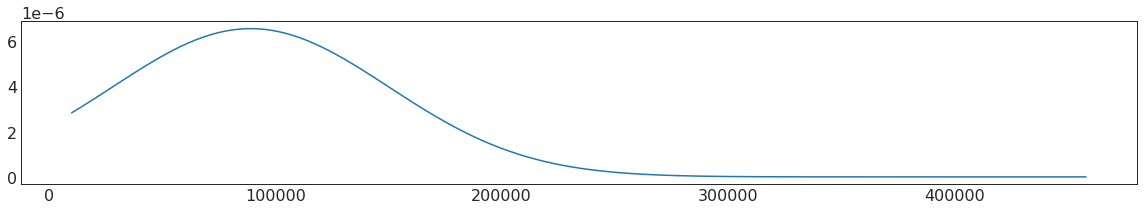

In [398]:
h = df1['MiddlePrice'].to_list()
h.sort()
hmean = np.mean(h)
hstd = np.std(h)
pdf = norm.pdf(h, hmean, hstd)
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(h, pdf) # including h here is crucial

На графике нормального распредедения видно, что большинство ноутбуков имеет цену в пределах 100000 руб.

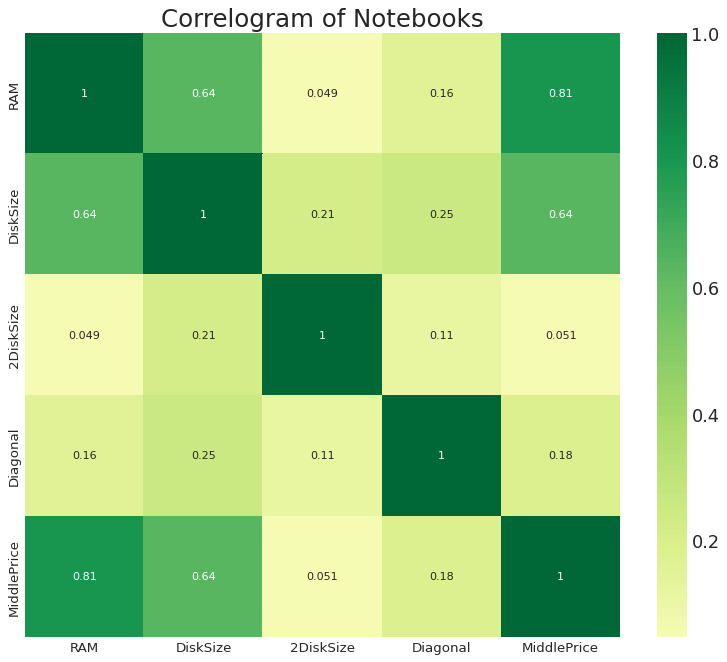

In [399]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df1.corr(), xticklabels=df1.corr().columns, yticklabels=df1.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Notebooks', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

На диаграмме корреляции видно, что самая сильная положительная корреляция между размером ОЗУ и стоимостью, также сильны положительные корреляции между размером 1ого диска и ОЗУ, а также диагональю.

In [400]:
categorical_columns= df1[['CPUSeries', 'DiskType', 'CPUModel', 'GPU', 'Resolution']]
categorical_columns

,CPUSeries,DiskType,CPUModel,GPU,Resolution
0,Apple,SSD,M1,M1 7-Core,2560x1600 (16:10)
1,Apple,SSD,M1,M1 7-Core,2560x1600 (16:10)
2,Apple,SSD,M1,M1 7-Core,2560x1600 (16:10)
3,Apple,SSD,M1 Max,M1 Max 24-Core,3024x1964
4,Apple,SSD,M1 Max,M1 Max 24-Core,3024x1964
...,...,...,...,...,...
4574,Core i5,SSD,7200U,HD Graphics 620,1920x1080 (16:9)
4575,Core i7,SSD M.2,7500U,HD Graphics 620,3840x2160 (16:9)
4576,Core i7,SSD M.2,7500U,HD Graphics 620,1920x1080 (16:9)
4577,Atom,eMMC,Z3735F,HD Graphics,1280x800 (16:10)


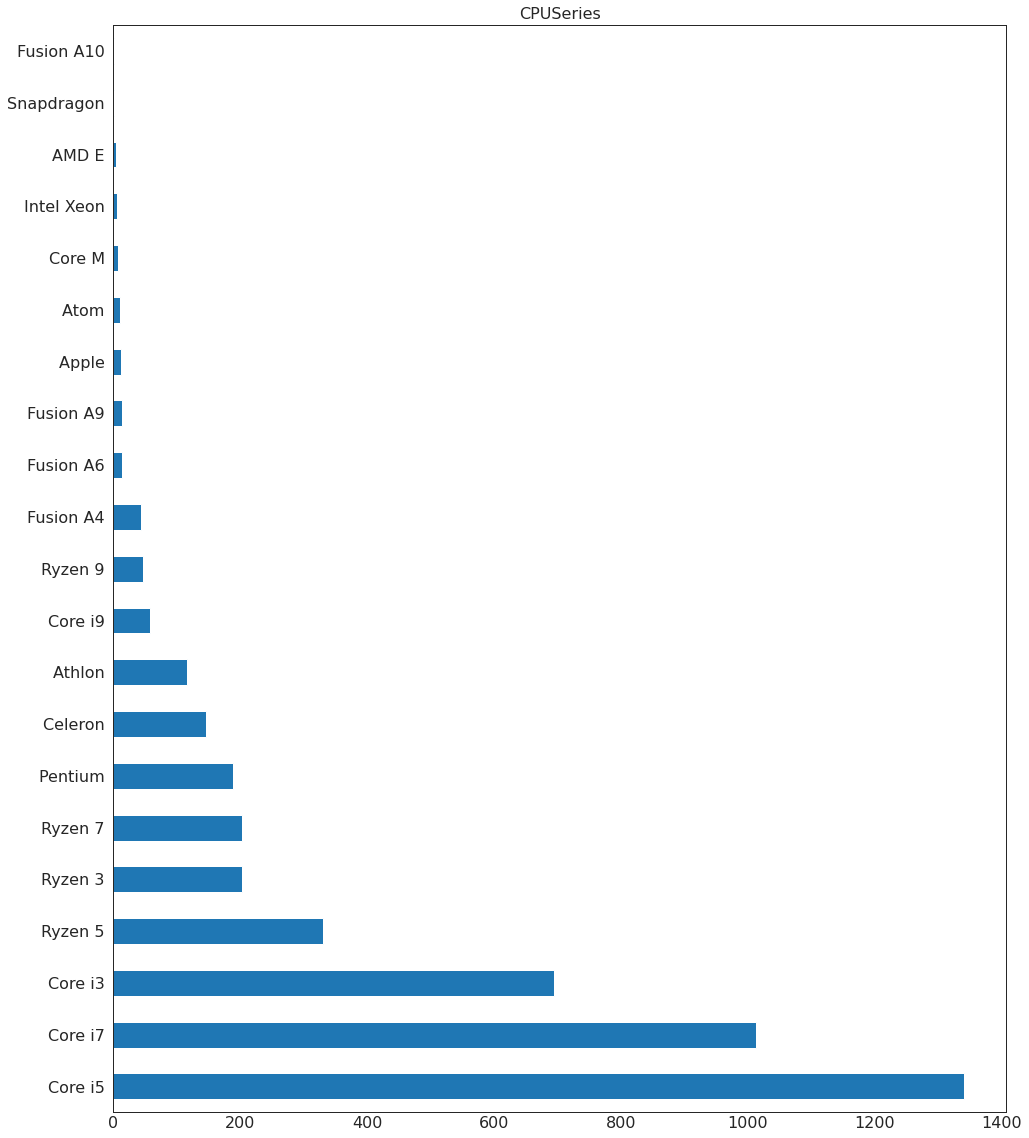

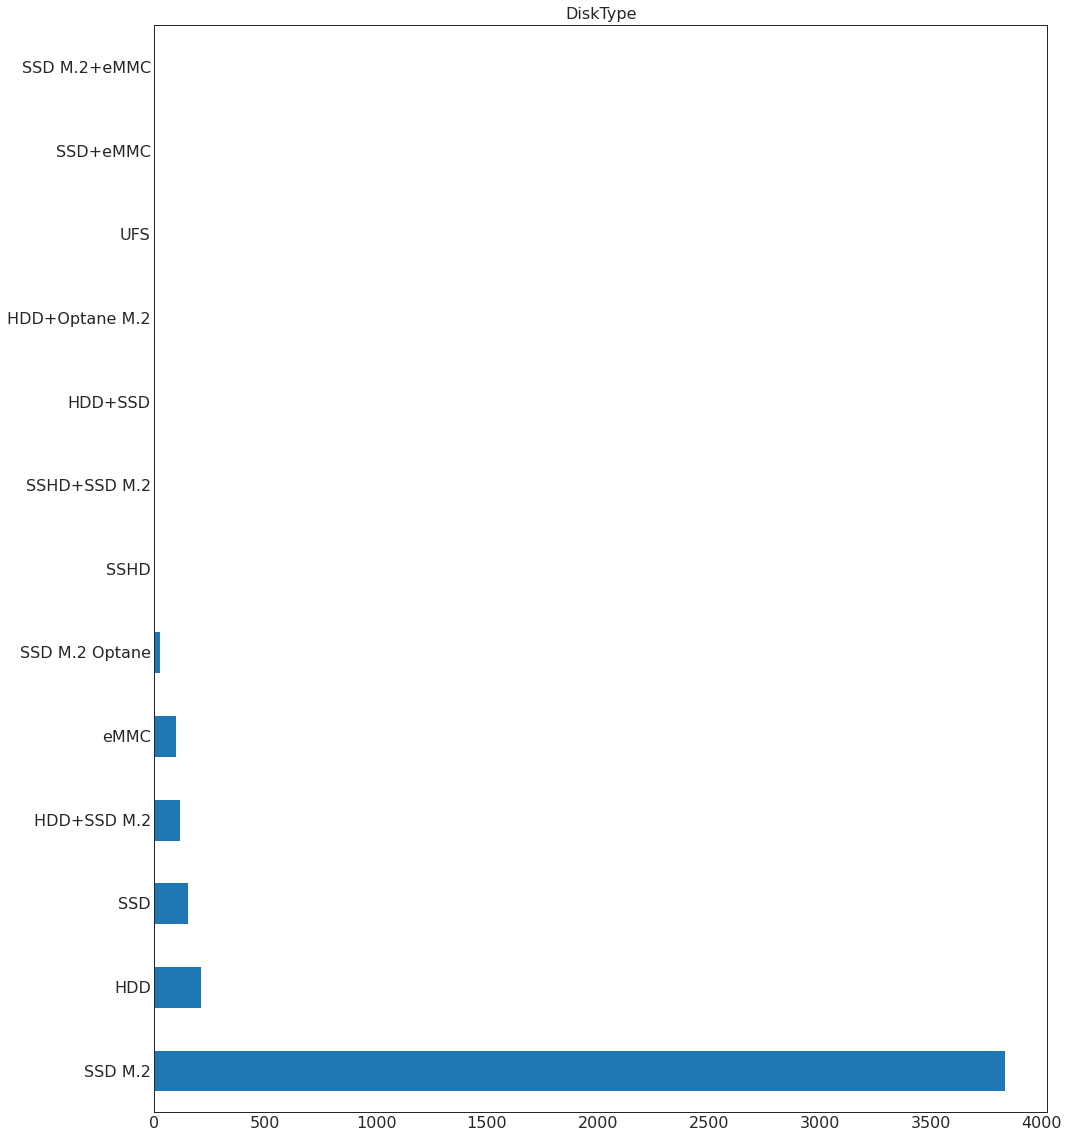

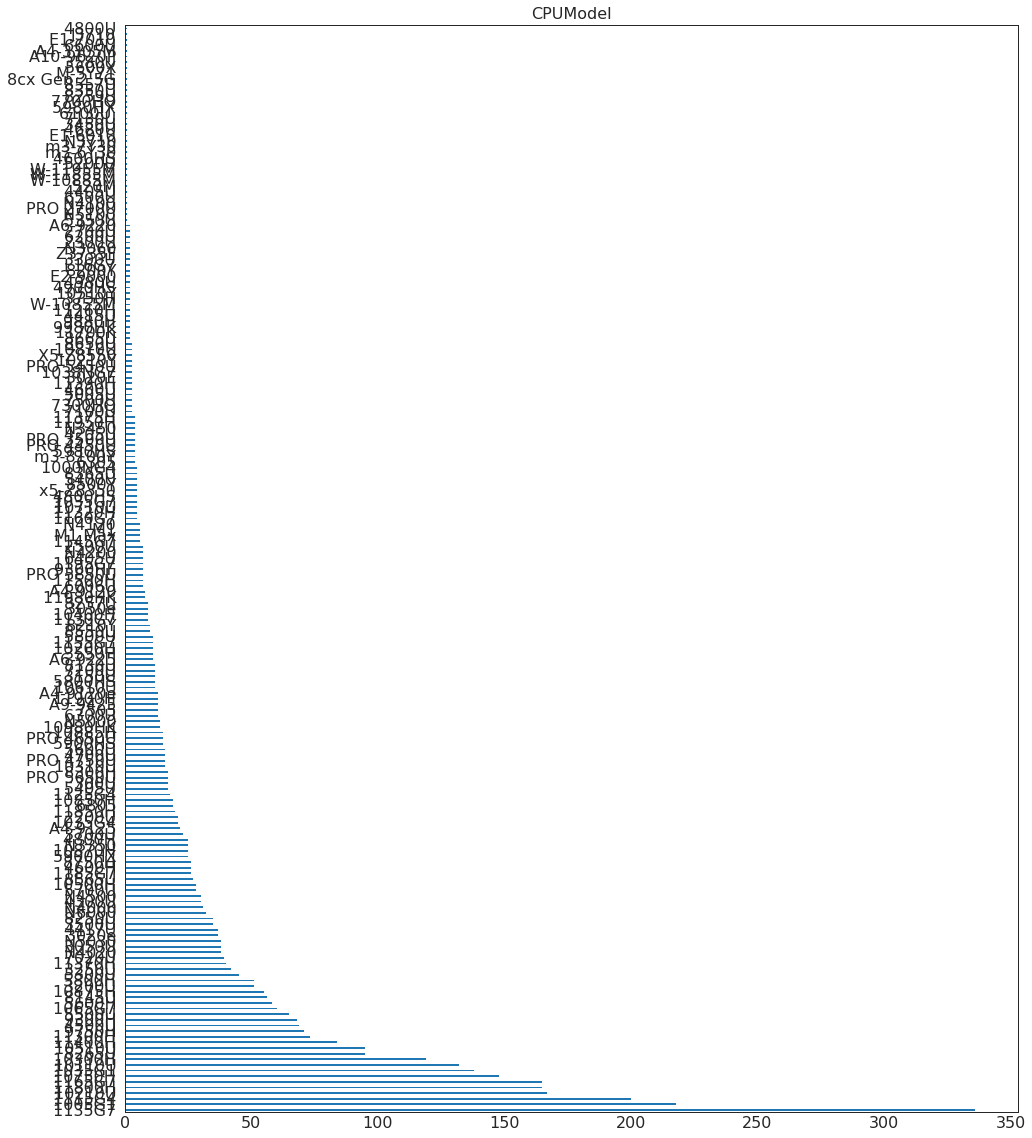

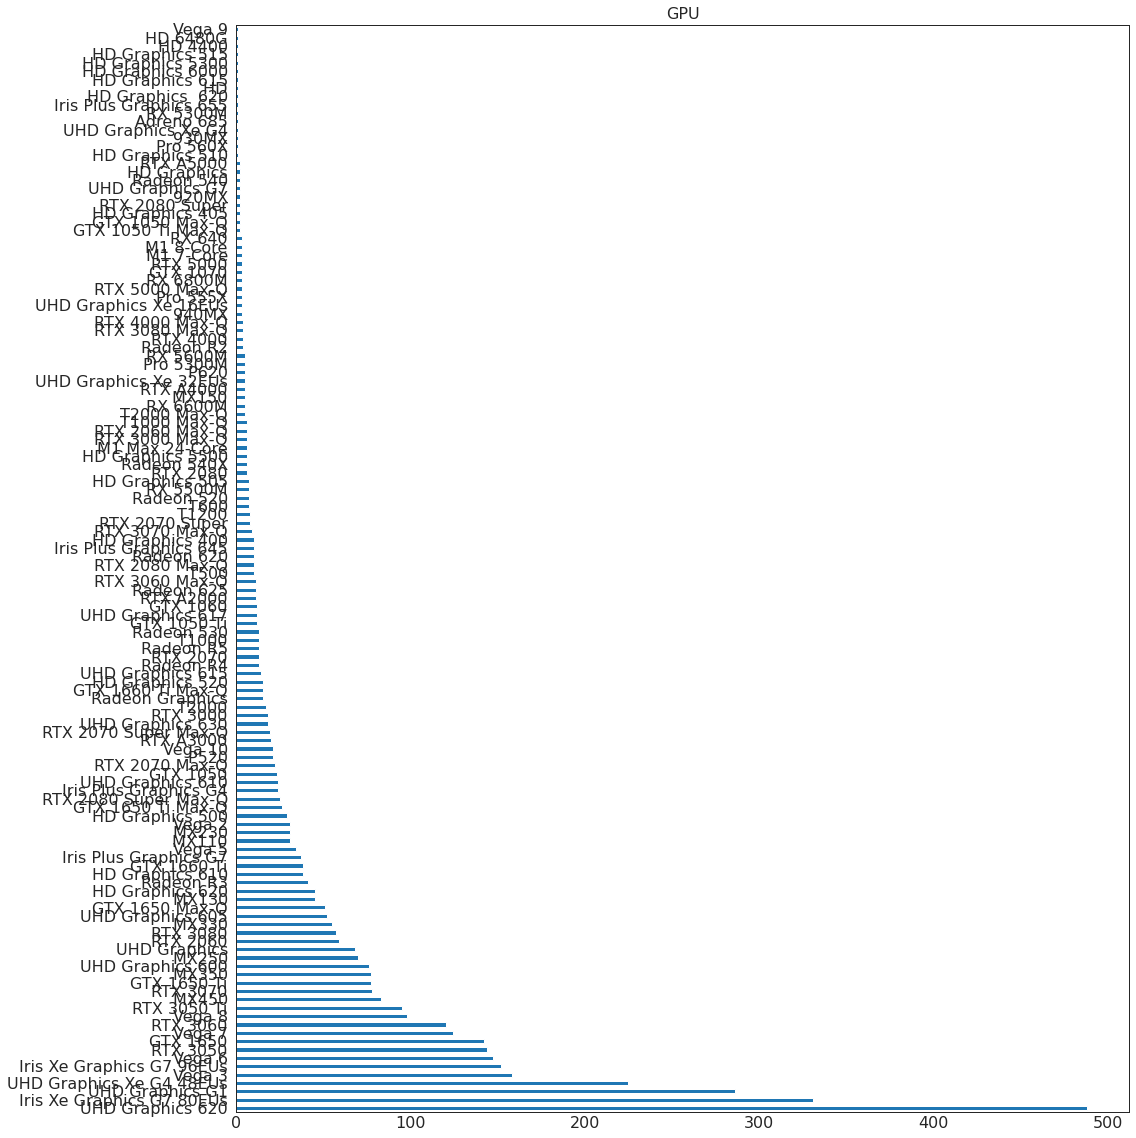

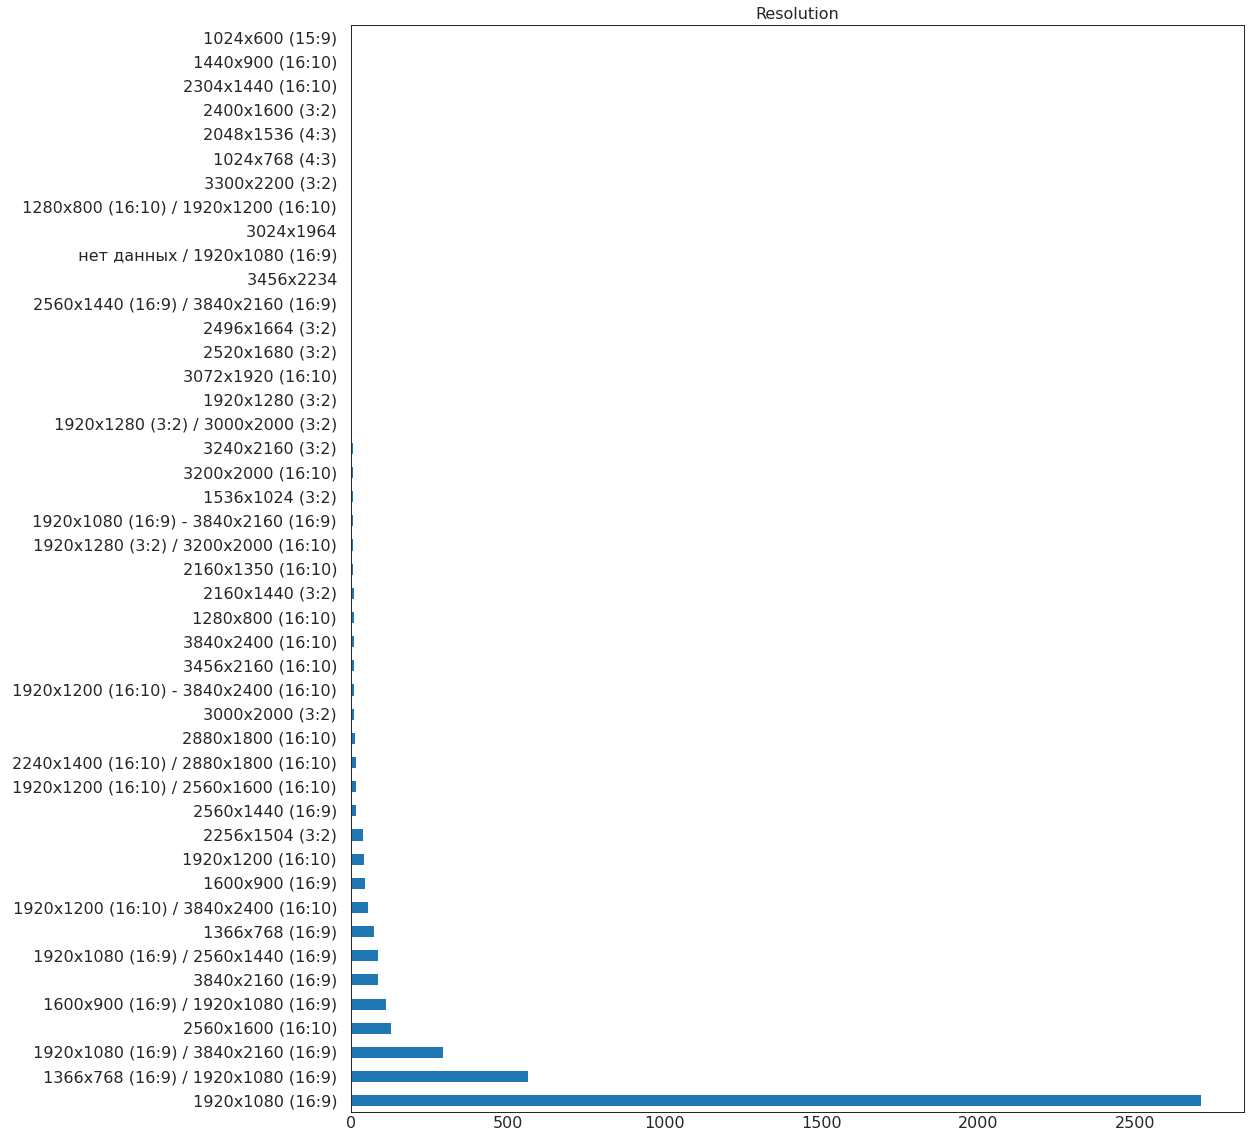

In [401]:
for col in categorical_columns:
    plt.figure(figsize=(16, 20))
    df1[col].value_counts().plot.barh()
    plt.title(col)

Из графика видно, что самый распространённый в ноутбуках процессор это core i5, самый распространённый тип накопителя SSD M2, самая распространённая модель процессора 1135G7, самый распространённый графический чип UHD Graphics 620, самое распространённое разрешение экрана 1920х1080.

Теперь рассмотрим связь категориальных признаков с ценой ноутбуков.

In [402]:
def box_two(col1, df, text, col2 = 'MiddlePrice'):
    plt.figure(figsize=(30, 15))
    sns.boxplot(x=col1, y=col2, data=df, linewidth=1)
    plt.title('Распределение ' + text + ' от Цены ноутбука', fontsize = 14)
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', labelsize=10)
    plt.grid(True)

In [403]:
txt_title = ['CPUSeries',
             'DiskType',
             'CPUModel',
             'GPU',
             'Resolution']

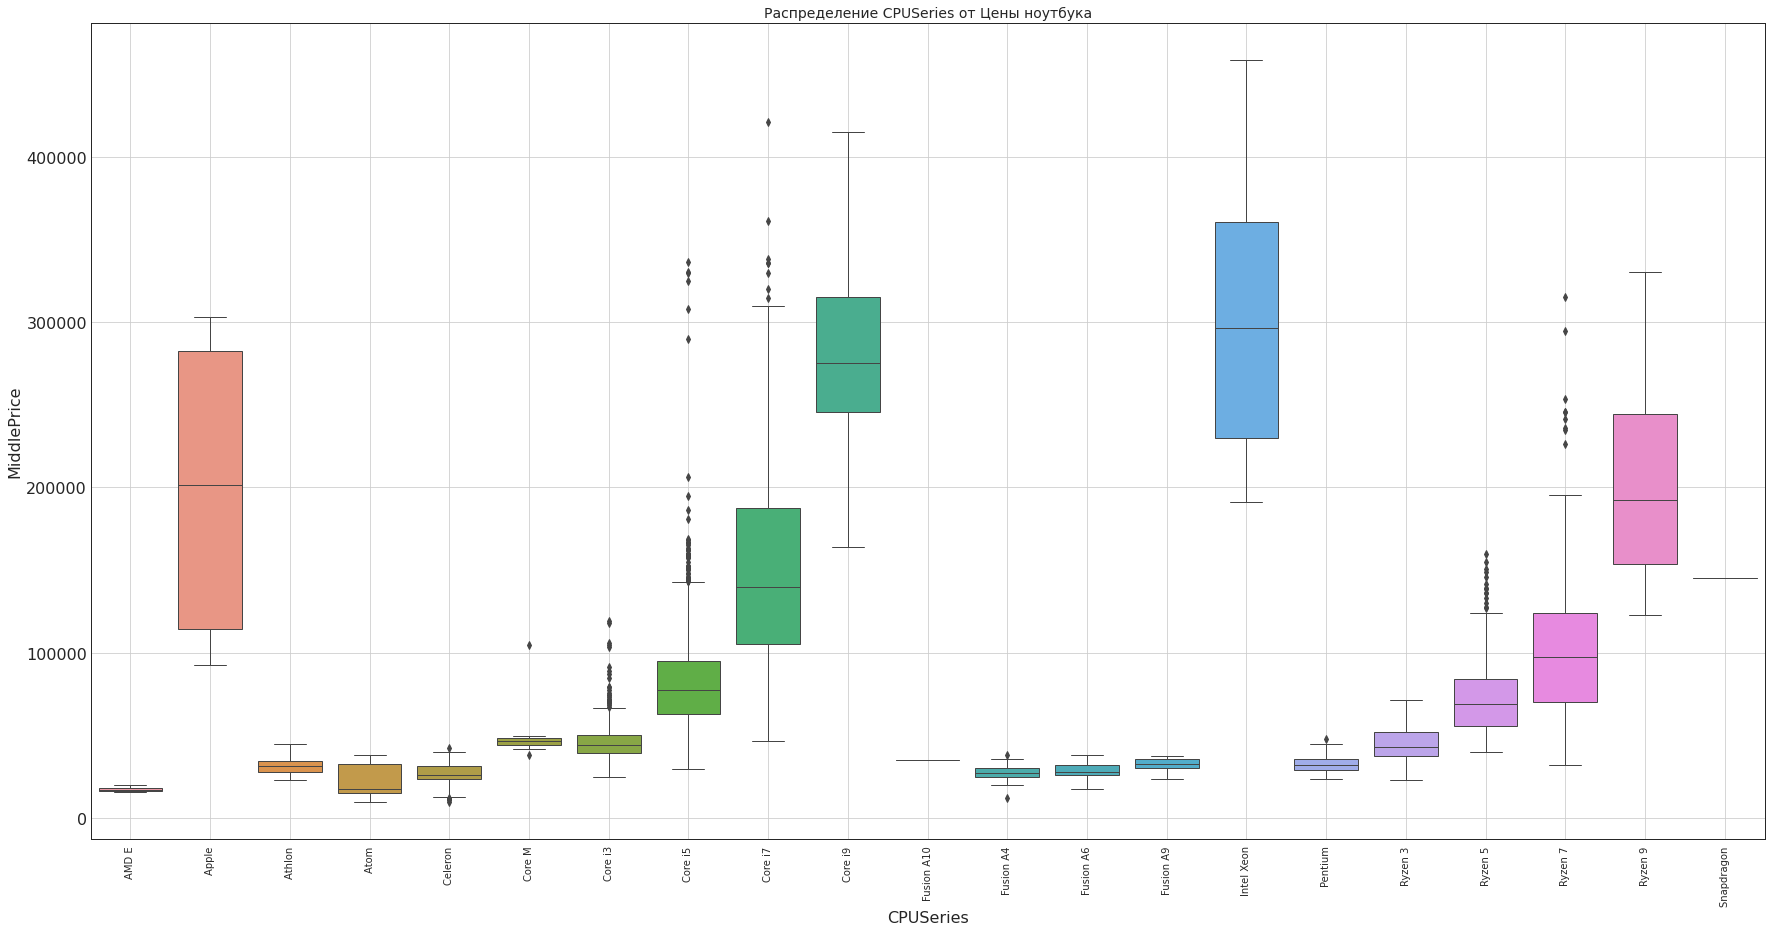

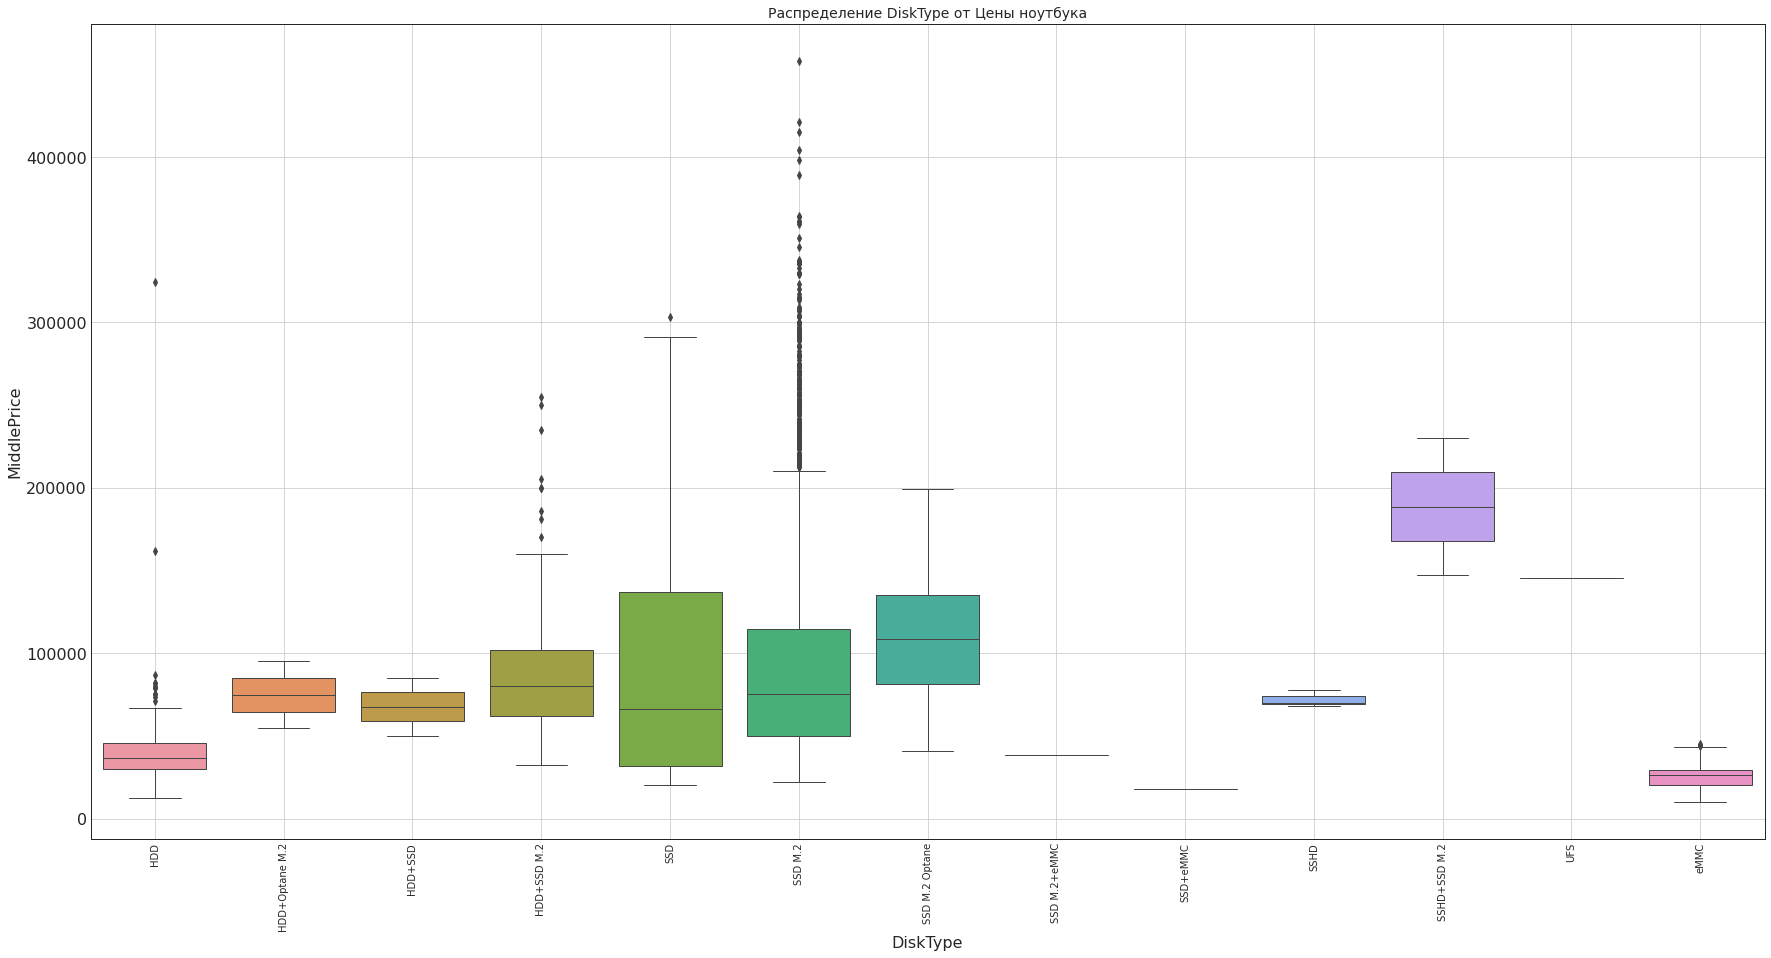

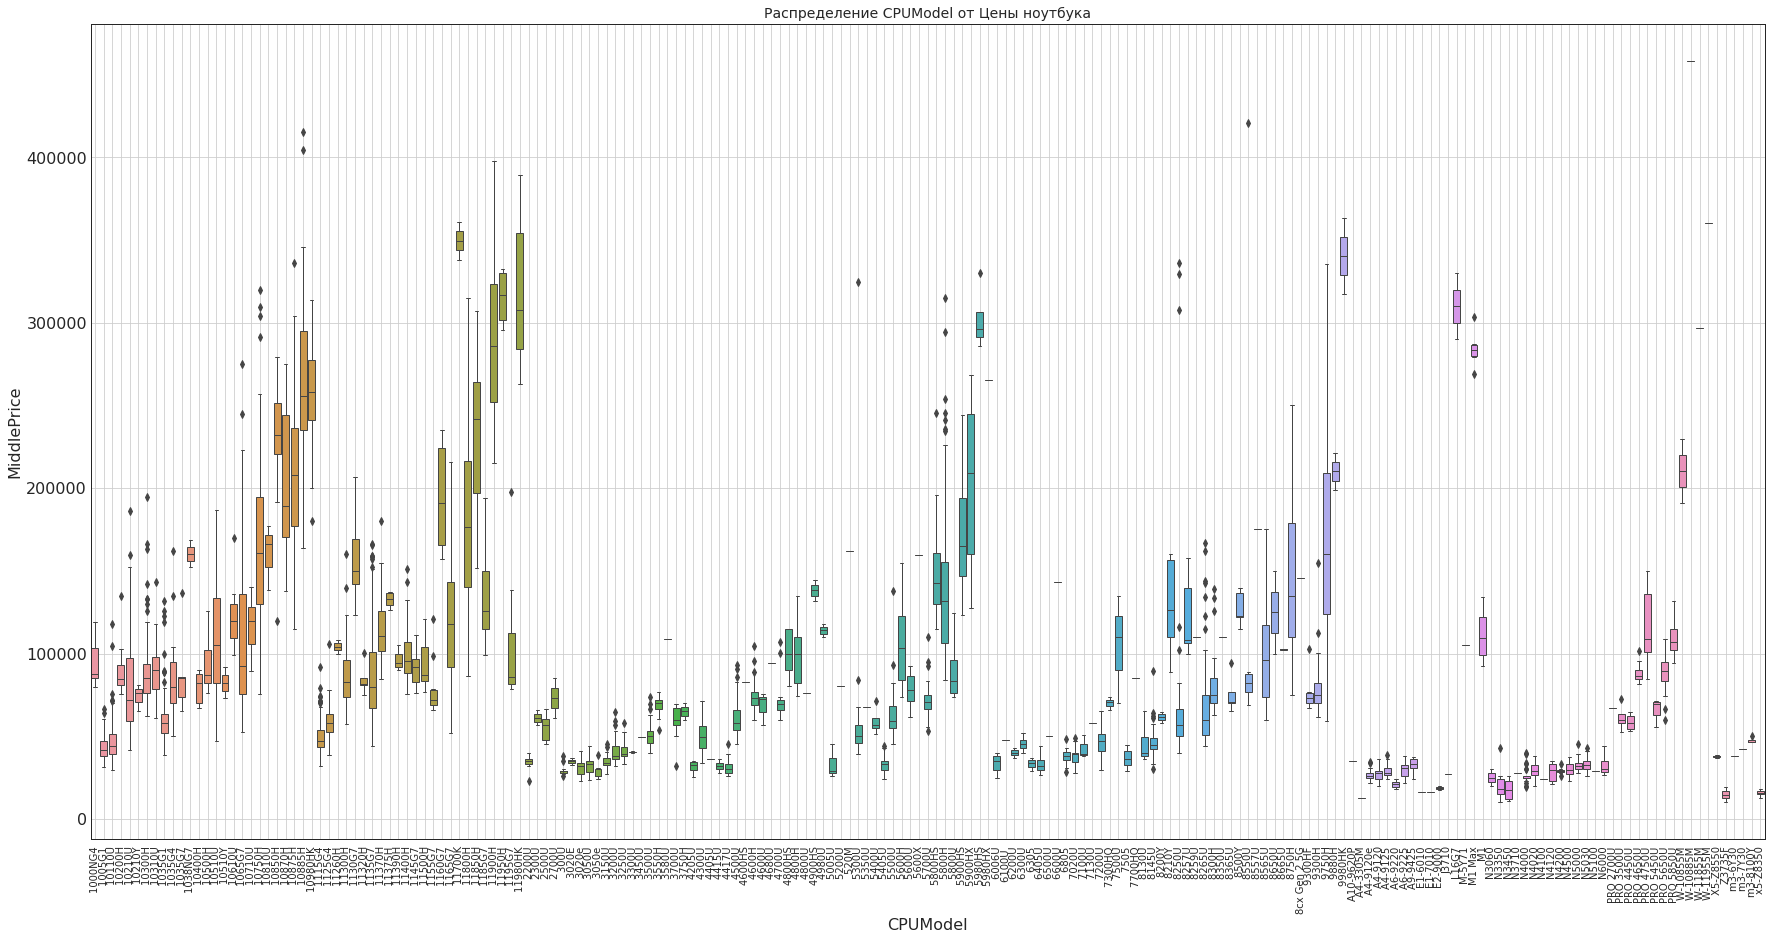

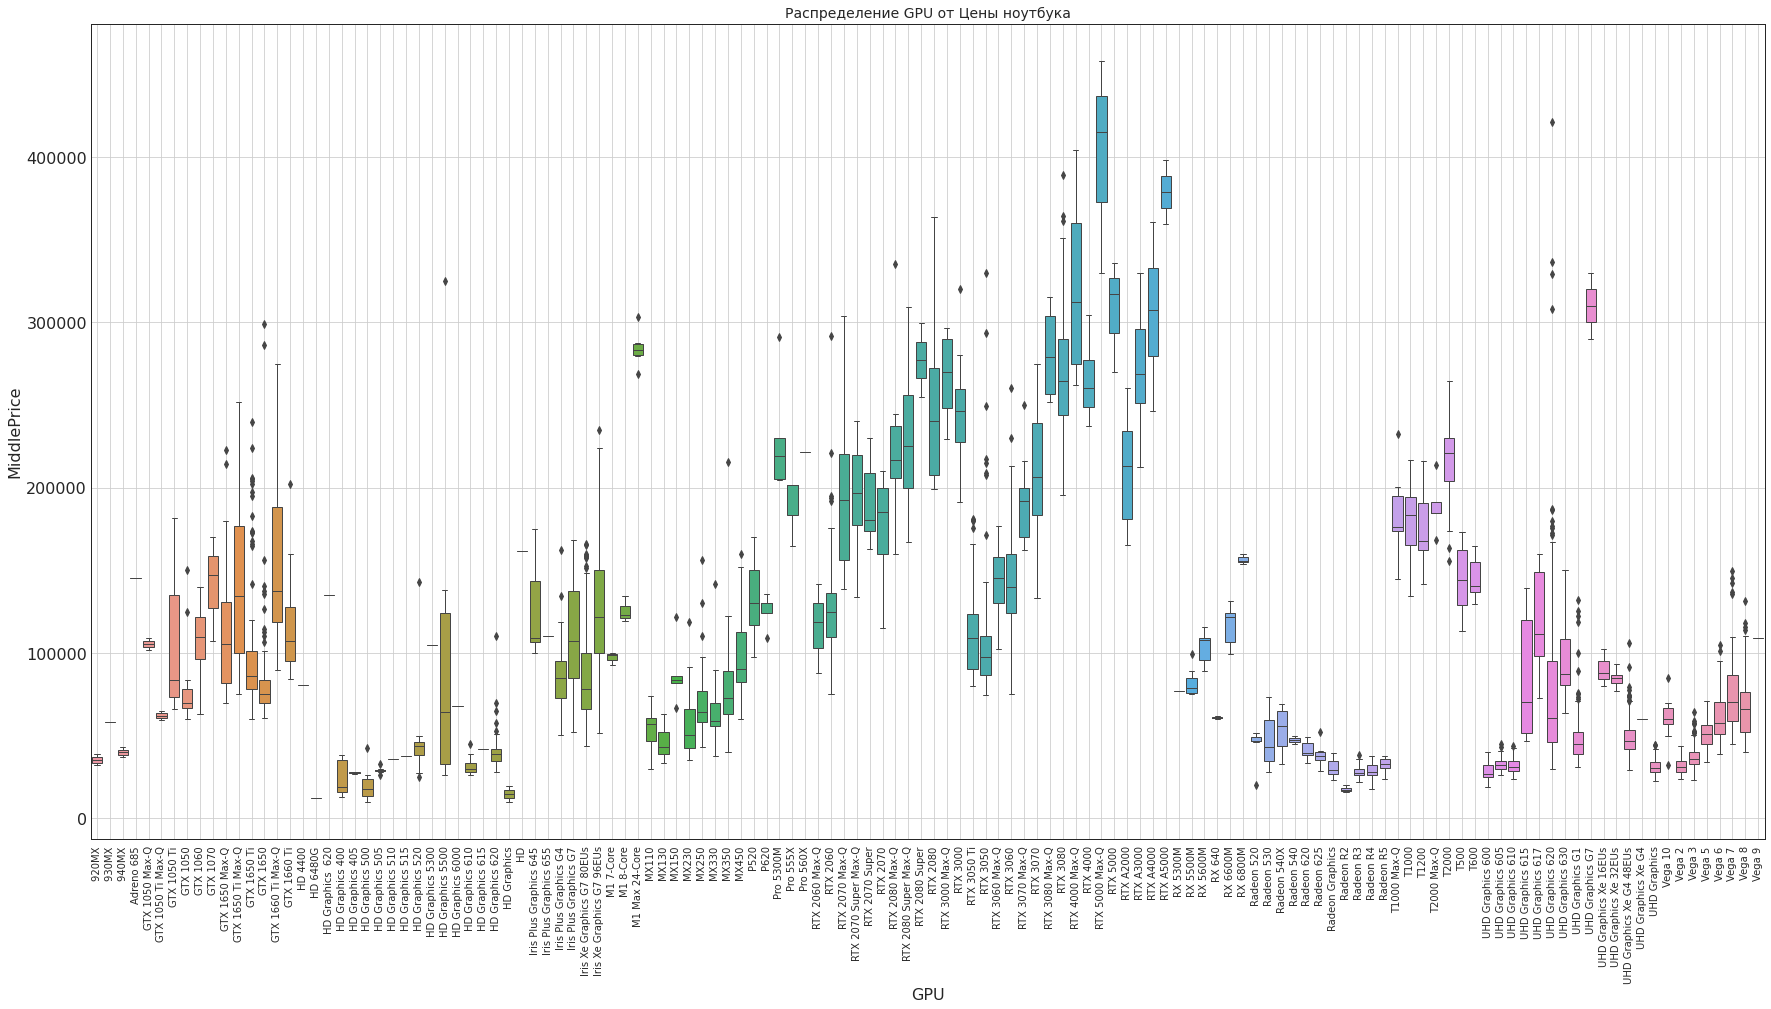

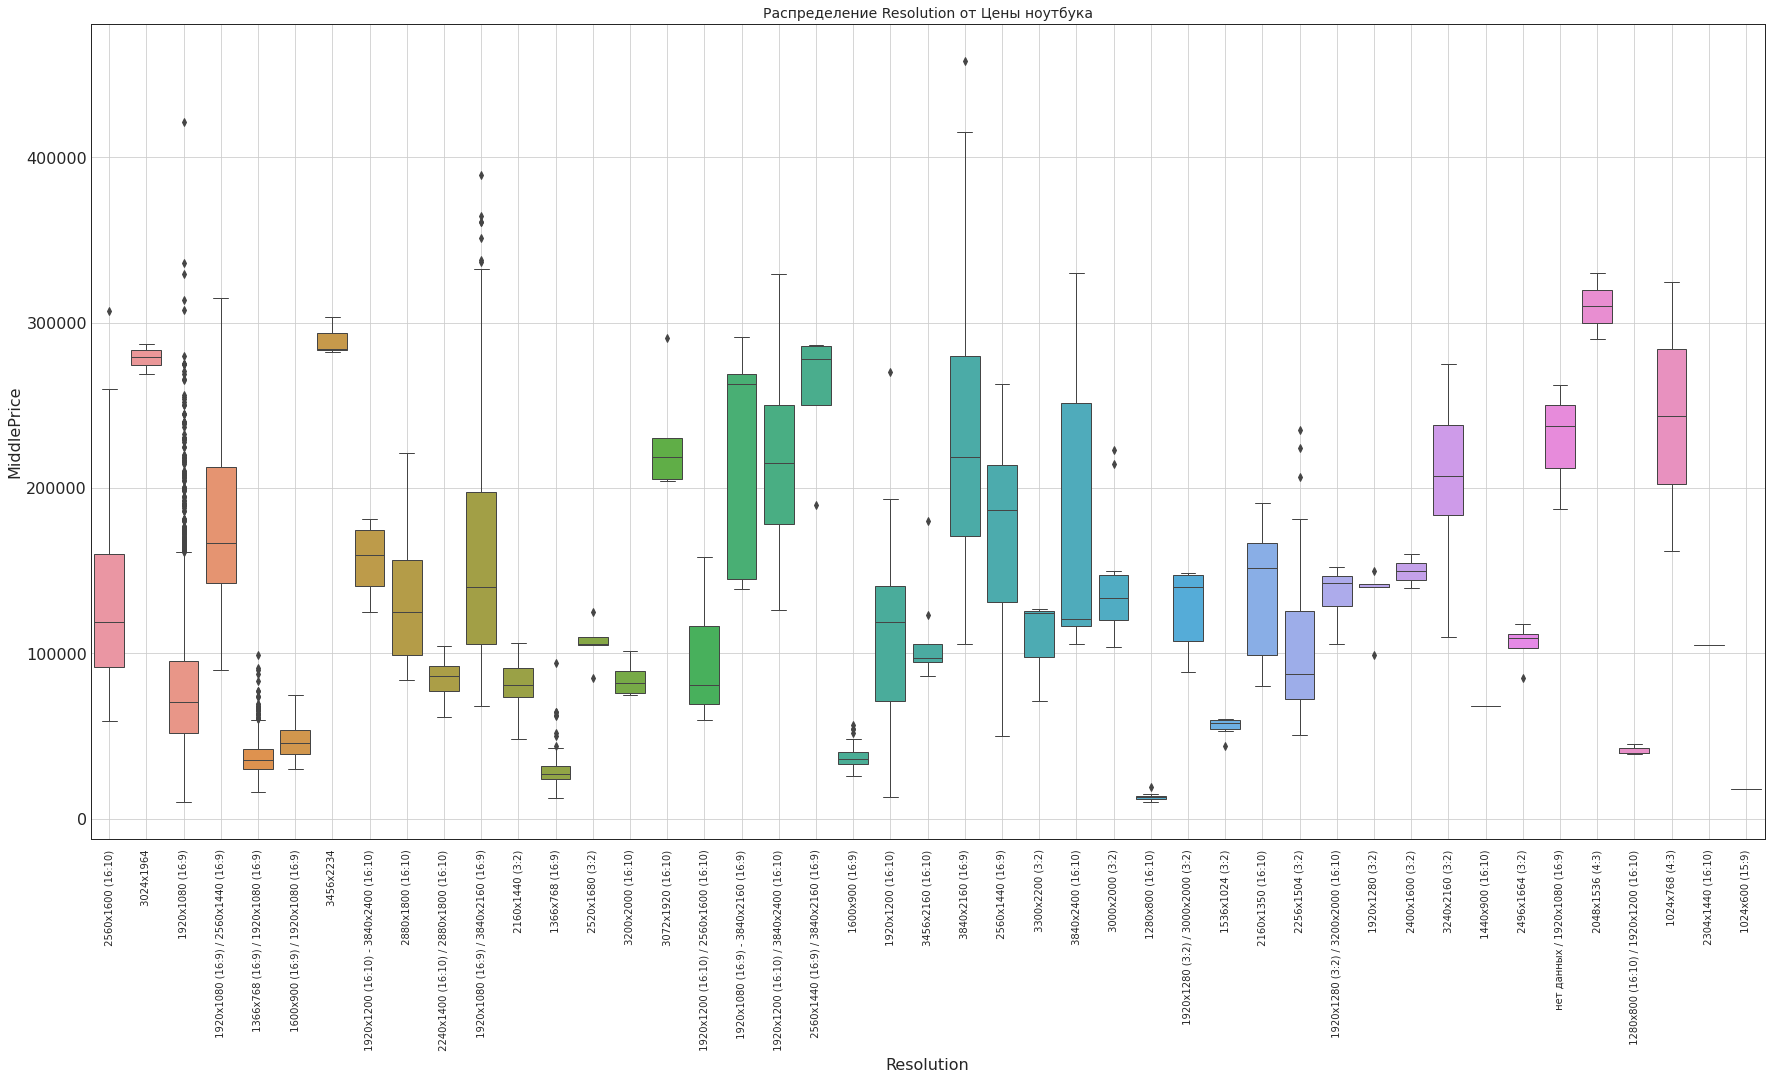

In [404]:
for ind, col in enumerate(categorical_columns):
    box_two(col, df1, txt_title[ind])

Исходя из представленной диаграммы можно сделать вывод, что самые распространённые процессоры серии Apple. Самый распространённый в ценовом диапазоне тип дисков SSD. Самая распространённая в ценовом диапазоне модель процессора 5980HS. Самая распространённая в ценовом диапазоне модель GPU HD Graphics 5500. Самое распространённое в ценовом диапазоне разрешение экрана 3840х2400 (16:10).

# Перевод категориальных в числа и Стандартизация 

In [405]:
from sklearn.preprocessing import MinMaxScaler
dfEncoded = df1.copy()

In [406]:
dfEncoded.head()

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99058.0
1,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),92500.0
2,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99768.0
3,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,279356.5
4,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,287356.5


In [407]:
dfEncoded.tail()

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
4574,Lenovo V510 14,Core i5,8,SSD,256,0,7200U,HD Graphics 620,14.0,1920x1080 (16:9),43197.0
4575,HP EliteBook 1040 G4,Core i7,8,SSD M.2,256,0,7500U,HD Graphics 620,14.0,3840x2160 (16:9),109990.0
4576,Lenovo ThinkPad X1 Carbon Gen5,Core i7,8,SSD M.2,256,0,7500U,HD Graphics 620,14.0,1920x1080 (16:9),134900.0
4577,Acer One 10 S1002,Atom,2,eMMC,32,0,Z3735F,HD Graphics,10.1,1280x800 (16:10),19495.0
4578,Asus ZenBook UX305CA,Core M,8,SSD,128,0,m3-6Y30,HD Graphics 515,13.3,1920x1080 (16:9),37990.0


In [408]:
dfEncoded.shape

(4449, 11)

In [409]:
dfEncoded['Resolution'] = dfEncoded['Resolution'].astype('category')
dfEncoded.dtypes

Model          category
CPUSeries      category
RAM               int64
DiskType       category
DiskSize          int64
2DiskSize         int64
CPUModel       category
GPU            category
Diagonal        float64
Resolution     category
MiddlePrice     float64
dtype: object

In [410]:
#Заменим категориальные данные на числовые
dfEncoded["Model"] = dfEncoded["Model"].cat.codes
dfEncoded["CPUSeries"] = dfEncoded["CPUSeries"].cat.codes
dfEncoded["DiskType"] = dfEncoded["DiskType"].cat.codes
dfEncoded["CPUModel"] = dfEncoded["CPUModel"].cat.codes
dfEncoded["GPU"] = dfEncoded["GPU"].cat.codes
dfEncoded["Resolution"] = dfEncoded["Resolution"].cat.codes
dfEncoded.head()

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,178,1,8,4,256,0,160,40,13.3,32,99058.0
1,178,1,8,4,256,0,160,40,13.3,32,92500.0
2,178,1,8,4,256,0,160,40,13.3,32,99768.0
3,180,1,32,4,1024,0,159,42,14.2,35,279356.5
4,180,1,32,4,1024,0,159,42,14.2,35,287356.5


In [411]:
dfEncoded.tail()

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
4574,1134,7,8,4,256,0,116,31,14.0,13,43197.0
4575,795,8,8,5,256,0,118,31,14.0,42,109990.0
4576,1095,8,8,5,256,0,118,18,14.0,13,134900.0
4577,109,3,2,12,32,0,188,32,10.1,3,19495.0
4578,514,5,8,4,128,0,189,24,13.3,13,37990.0


In [412]:
#dfEncoded['Model'] = dfEncoded['Model'].astype('category')
#dfEncoded['CPUSeries'] = dfEncoded['CPUSeries'].astype('category')
#dfEncoded['DiskType'] = dfEncoded['DiskType'].astype('category')
#dfEncoded['CPUModel'] = df1['CPUModel'].astype('category')
#dfEncoded['GPU'] = dfEncoded['GPU'].astype('category')
#dfEncoded['Resolution'] = dfEncoded['Resolution'].astype('category')
#dfEncoded['MiddlePrice'] = dfEncoded['MiddlePrice'].astype('float64')

In [413]:
del dfEncoded['Model']

In [414]:
dfEncoded.dtypes

CPUSeries         int8
RAM              int64
DiskType          int8
DiskSize         int64
2DiskSize        int64
CPUModel         int16
GPU              int16
Diagonal       float64
Resolution        int8
MiddlePrice    float64
dtype: object

In [415]:
dfNormalized = dfEncoded.copy()
numerical_columns = dfNormalized[['RAM', 'DiskSize', '2DiskSize', 'Diagonal', 'MiddlePrice']]
scaler = MinMaxScaler(feature_range = (0, 1))
for col in numerical_columns:
    if col != 'MiddlePrice':
        dfNormalized[col] = scaler.fit_transform(dfNormalized[col].values.reshape(-1, 1))
dfNormalized.head()

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,1,0.096774,4,0.111111,0.0,160,40,0.444444,32,99058.0
1,1,0.096774,4,0.111111,0.0,160,40,0.444444,32,92500.0
2,1,0.096774,4,0.111111,0.0,160,40,0.444444,32,99768.0
3,1,0.483871,4,0.492063,0.0,159,42,0.569444,35,279356.5
4,1,0.483871,4,0.492063,0.0,159,42,0.569444,35,287356.5


In [416]:
dfNormalized.shape

(4449, 10)

# Кластерный анализ

In [417]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
K = range(1, 19)
models = [KMeans(n_clusters=k, random_state=42).fit(dfNormalized.iloc[:, :-1]) for k in K]
dist = [model.inertia_ for model in models]

In [418]:
dist

[19572235.672973625,
 9739163.31793814,
 5914572.712683557,
 3984874.366792719,
 2739397.9440036425,
 2297528.144694361,
 1879372.3870883717,
 1636460.7178342438,
 1470271.596362754,
 1290395.5886193118,
 1124003.4362332993,
 978480.8309552751,
 856093.6693074206,
 767581.0593430332,
 716400.0094437064,
 661764.5142138733,
 612232.8513739109,
 568953.8863338502]

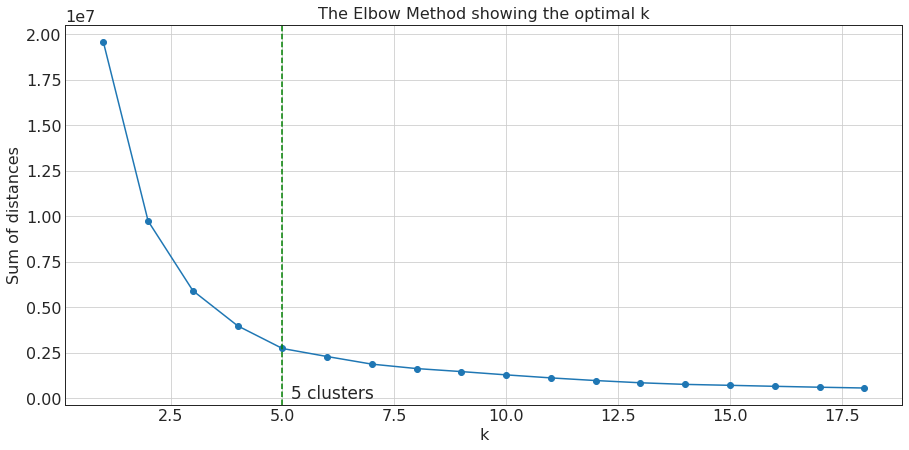

In [419]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.axvline(5, c='g', linestyle='dashed')
plt.text(5.2, 14000, '5 clusters', size = 17)
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

По визуализации суммы расстояний, можно предположить, что оптимальное кол-во кластеров равно 5.

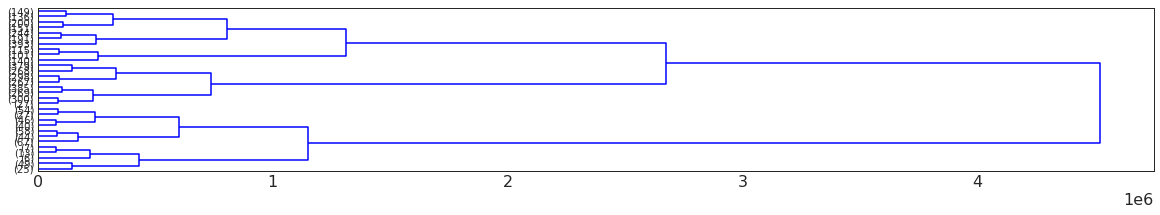

In [420]:
link = linkage(dfNormalized, 'ward', 'euclidean')
dend = dendrogram(link,
                  labels = dfNormalized.index.to_list(),
                  truncate_mode='lastp', 
                  color_threshold=5,
                  orientation = "right",
                  leaf_rotation=0.)

Будет использовано 5 кластеров.

In [421]:
model_opt = KMeans(n_clusters = 5, random_state = 42)
model_opt.fit(dfNormalized)
model_opt.labels_ # Метод опеределения кластера для каждого экзмепляра

array([2, 2, 2, ..., 4, 0, 0], dtype=int32)

In [422]:
dfNormalized['cluster'] = model_opt.labels_
dfNormalized.head(10)

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice,cluster
0,1,0.096774,4,0.111111,0.0,160,40,0.444444,32,99058.0,2
1,1,0.096774,4,0.111111,0.0,160,40,0.444444,32,92500.0,2
2,1,0.096774,4,0.111111,0.0,160,40,0.444444,32,99768.0,2
3,1,0.483871,4,0.492063,0.0,159,42,0.569444,35,279356.5,3
4,1,0.483871,4,0.492063,0.0,159,42,0.569444,35,287356.5,3
5,1,0.483871,4,0.238095,0.0,159,42,0.569444,35,268999.0,3
6,17,0.225806,5,0.238095,0.0,93,71,0.819444,32,141404.0,4
7,17,0.225806,5,0.492063,0.0,93,71,0.819444,32,145858.5,4
8,17,0.225806,5,0.238095,0.0,93,71,0.819444,32,148904.0,4
9,17,0.225806,5,0.492063,0.0,93,71,0.819444,32,126990.0,4


In [423]:
dfNormalized.groupby('cluster').mean()

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
cluster,,,,,,,,,,
0,8.743191,0.066569,4.779878,0.148409,0.002814,70.430795,99.857143,0.682493,9.627571,41857.704280
1,8.817175,0.280225,4.914127,0.403948,0.012033,50.157895,64.800554,0.758387,18.958449,188834.174515
2,9.302534,0.133431,4.847243,0.223809,0.009303,53.825633,63.616244,0.673249,13.994039,78907.522727
3,9.380952,0.409797,4.894180,0.557099,0.010582,58.544974,71.375661,0.830467,22.037037,279266.240741
4,9.275726,0.200783,4.934037,0.285837,0.007256,54.032982,61.596306,0.667051,16.047493,124504.143799


In [424]:
dfNormalized.groupby('cluster').size()

cluster
0    1799
1     361
2    1342
3     189
4     758
dtype: int64

Самый многочисленный - 1ый кластер.

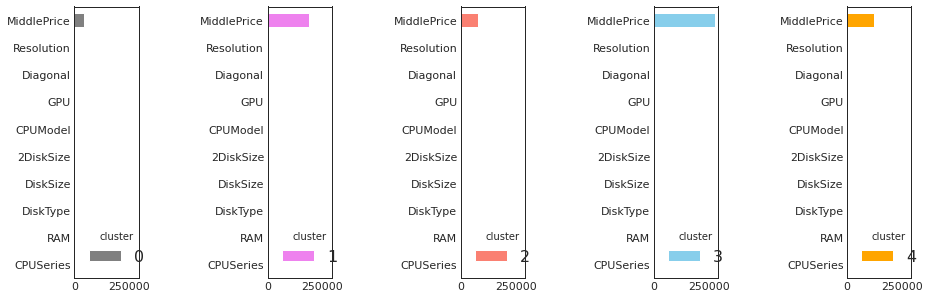

In [425]:
fig, axs = plt.subplots(nrows=1, ncols=5, sharex=True)
fig.set_size_inches(15, 5)
plt.subplots_adjust(wspace = 2)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange', 'red']
for j in range(5):
    ax = axs[j]
    k += 1
    dfNormalized[dfNormalized.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
    ax.tick_params(labelsize = 11)

Попробуем закодировать через LabelEncoder

In [426]:
dfNew = df1.copy()
dfNew = dfNew.dropna() 
del dfNew['Model']
dfNew.head(10)

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99058.0
1,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),92500.0
2,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99768.0
3,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,279356.5
4,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,287356.5
5,Apple,32,SSD,512,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,268999.0
6,Ryzen 5,16,SSD M.2,512,0,5600H,RTX 3060,16.0,2560x1600 (16:10),141404.0
7,Ryzen 5,16,SSD M.2,1024,0,5600H,RTX 3060,16.0,2560x1600 (16:10),145858.5
8,Ryzen 5,16,SSD M.2,512,0,5600H,RTX 3060,16.0,2560x1600 (16:10),148904.0
9,Ryzen 5,16,SSD M.2,1024,0,5600H,RTX 3060,16.0,2560x1600 (16:10),126990.0


In [427]:
categorical_columns= dfNew[['CPUSeries', 'DiskType', 'CPUModel', 'GPU', 'Resolution']]
numerical_columns = dfNew[['RAM', 'DiskSize', '2DiskSize', 'Diagonal', 'MiddlePrice']]

In [428]:
encoder = LabelEncoder()
for col in categorical_columns:
    col_encoder = pd.Series(encoder.fit_transform(dfNew[col]))
    dfNew[col] = col_encoder
dfNew.head()

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,1.0,8,4.0,256,0,160.0,40.0,13.3,32.0,99058.0
1,1.0,8,4.0,256,0,160.0,40.0,13.3,32.0,92500.0
2,1.0,8,4.0,256,0,160.0,40.0,13.3,32.0,99768.0
3,1.0,32,4.0,1024,0,159.0,42.0,14.2,35.0,279356.5
4,1.0,32,4.0,1024,0,159.0,42.0,14.2,35.0,287356.5


In [429]:
dfNew = dfNew.dropna() 
dfNew.isnull().sum()

CPUSeries      0
RAM            0
DiskType       0
DiskSize       0
2DiskSize      0
CPUModel       0
GPU            0
Diagonal       0
Resolution     0
MiddlePrice    0
dtype: int64

In [430]:
dfNew.shape

(4325, 10)

In [431]:
dfNew

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,1.0,8,4.0,256,0,160.0,40.0,13.3,32.0,99058.0
1,1.0,8,4.0,256,0,160.0,40.0,13.3,32.0,92500.0
2,1.0,8,4.0,256,0,160.0,40.0,13.3,32.0,99768.0
3,1.0,32,4.0,1024,0,159.0,42.0,14.2,35.0,279356.5
4,1.0,32,4.0,1024,0,159.0,42.0,14.2,35.0,287356.5
...,...,...,...,...,...,...,...,...,...,...
4444,7.0,8,4.0,256,0,116.0,31.0,14.0,13.0,68430.0
4445,8.0,8,5.0,256,0,118.0,31.0,14.0,42.0,72920.0
4446,8.0,8,5.0,512,0,118.0,18.0,14.0,13.0,78220.0
4447,3.0,8,12.0,256,0,188.0,32.0,13.3,3.0,101926.0


In [432]:
scaler = MinMaxScaler(feature_range = (0, 1))
for col in numerical_columns:
    dfNew[col] = scaler.fit_transform(dfNew[col].values.reshape(-1, 1))
dfNew.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,1.0,0.096774,4.0,0.111111,0.0,160.0,40.0,0.444444,32.0,0.198705
1,1.0,0.096774,4.0,0.111111,0.0,160.0,40.0,0.444444,32.0,0.184073
2,1.0,0.096774,4.0,0.111111,0.0,160.0,40.0,0.444444,32.0,0.200289
3,1.0,0.483871,4.0,0.492063,0.0,159.0,42.0,0.569444,35.0,0.600981
4,1.0,0.483871,4.0,0.492063,0.0,159.0,42.0,0.569444,35.0,0.618830


In [433]:
K = range(1, 19)
models = [KMeans(n_clusters=k, random_state=42).fit(dfNew.iloc[:, :-1]) for k in K]
dist = [model.inertia_ for model in models]

In [434]:
dist

[18979775.16975952,
 9454193.645638946,
 5727633.212355378,
 3868574.531912956,
 2665030.9517532242,
 2233598.776469906,
 1825537.4981143014,
 1591794.6597347392,
 1406632.2738468708,
 1252130.666031623,
 1106078.99284789,
 948339.0152790551,
 835671.329974466,
 747872.7424266262,
 700598.2952260097,
 643364.4983201389,
 598682.8085170356,
 552726.7379237677]

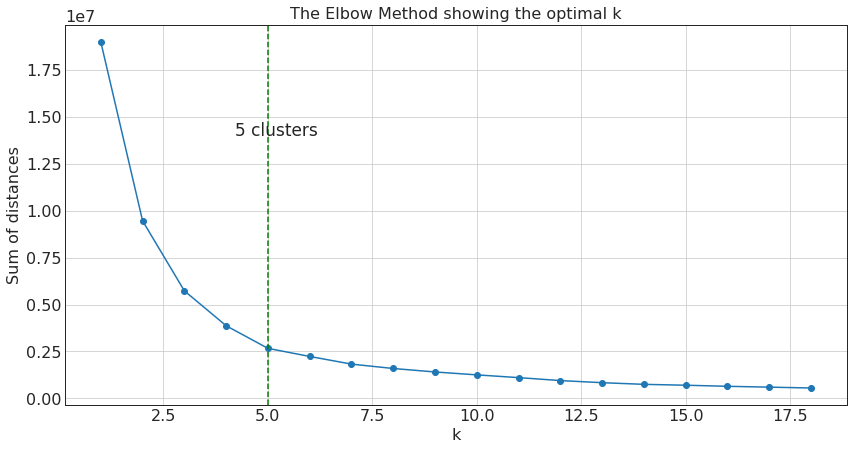

In [435]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.axvline(5, c='g', linestyle='dashed')
plt.text(4.2, 14000000, '5 clusters', size = 17)
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

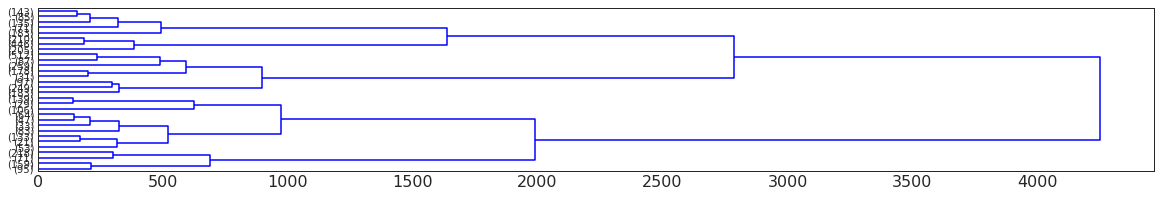

In [436]:
link = linkage(dfNew, 'ward', 'euclidean')
dend = dendrogram(link,
                  labels = dfNew.index.to_list(),
                  truncate_mode='lastp', 
                  color_threshold=5,
                  orientation = "right",
                  leaf_rotation=0.)

По визуализации суммы расстояний и дендрограмме можно сделать вывод, что оптимальное кол-во кластеров: 5

In [437]:
model_opt = KMeans(n_clusters = 5, random_state = 42)
model_opt.fit(dfNew)
model_opt.labels_ # Метод опеределения кластера для каждого экзмепляра

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [438]:
dfNew['cluster'] = model_opt.labels_
dfNew.head()

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice,cluster
0,1.0,0.096774,4.0,0.111111,0.0,160.0,40.0,0.444444,32.0,0.198705,4
1,1.0,0.096774,4.0,0.111111,0.0,160.0,40.0,0.444444,32.0,0.184073,4
2,1.0,0.096774,4.0,0.111111,0.0,160.0,40.0,0.444444,32.0,0.200289,4
3,1.0,0.483871,4.0,0.492063,0.0,159.0,42.0,0.569444,35.0,0.600981,4
4,1.0,0.483871,4.0,0.492063,0.0,159.0,42.0,0.569444,35.0,0.618830,4


In [439]:
dfNew.groupby('cluster').mean()

,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
cluster,,,,,,,,,,
0,13.958861,0.141001,4.905063,0.234780,0.005785,73.185127,120.952532,0.711520,11.308544,0.165840
1,9.567416,0.143379,5.029963,0.230471,0.006437,151.265918,111.882022,0.660268,10.213483,0.192515
2,7.594176,0.138676,4.916357,0.232294,0.006583,27.514870,46.771375,0.693085,15.962825,0.171260
3,6.562854,0.140796,4.706682,0.227197,0.006813,11.284258,114.235561,0.694429,11.540204,0.173081
4,10.607251,0.149742,4.654079,0.240238,0.004957,119.392749,37.932024,0.688906,13.927492,0.191546


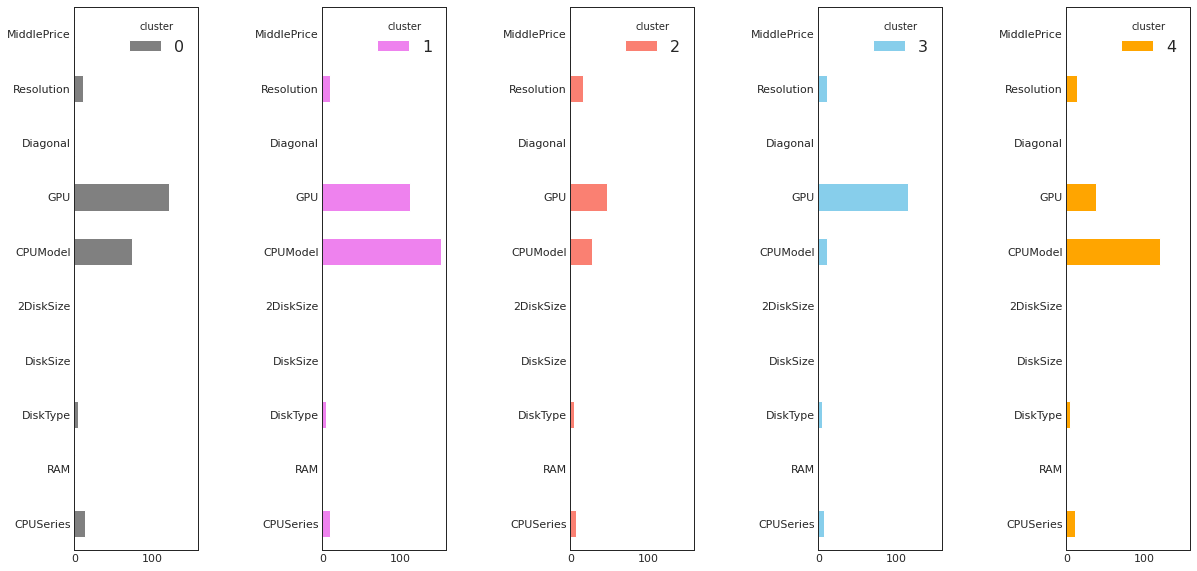

In [440]:
fig, axs = plt.subplots(nrows=1, ncols=5, sharex=True)
fig.set_size_inches(20, 10)
plt.subplots_adjust(wspace = 1)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange', 'red']
for j in range(5):
    ax = axs[j]
    k += 1
    dfNew[dfNew.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
    ax.tick_params(labelsize = 11)

Можно сделать вывод: самые важные параметры при разделении на кластеры то модель GPU и CPU. Менее важными являются разрешение экрана, тип диска, серия процессора.

# Регрессия

In [441]:
dfReg = dfEncoded.copy()
#del dfReg['cluster']
X = dfReg.drop('MiddlePrice', axis = 1)
Y = dfReg['MiddlePrice']
X.shape, Y.shape

((4449, 9), (4449,))

In [442]:
x_train, x_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=17)

In [443]:
def learn(X_train, X_test, Y_train, Y_test, columns, model_name = 'LinearRegression', alphas =[0.5]):
    if model_name == 'LinearRegression':
        model = LinearRegression()
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) на трейн = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тест = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        return score1, score2, RMSE
    
    elif model_name == 'Ridge':
        if len(alphas) > 1:
            return 'Передайте в гребневую регрессию один гиперпараметр'
        else:
            model = Ridge(alphas[0])
            model.fit(X_train, Y_train)
            score1 = "Качество модели (R^2) на трейн = {}".format(model.score(X_train, Y_train))
            pred = model.predict(X_test)
            score2 = "Качество модели (R^2) на тест = {}".format(r2_score(Y_test, pred))
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score1, score2, RMSE
 
    elif model_name == 'Lasso':
        if len(alphas) > 1:
            return 'Передайте в Лассо регрессию один гиперпараметр'
        else:
            model = Lasso(alphas[0])
            model.fit(X_train, Y_train)
            score1 = "Качество модели (R^2) на трейн = {}".format(model.score(X_train, Y_train))
            pred = model.predict(X_test)
            score2 = "Качество модели (R^2) на тест = {}".format(r2_score(Y_test, pred))
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score1, score2, RMSE                                      
    
    elif model_name == 'RidgeCV':
        model = RidgeCV(alphas)
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) на трейн = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тест = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score1, score2, RMSE, alpha
 
    elif model_name == 'LassoCV':
        model = LassoCV(alphas = alphas)
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) на трейн = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тест = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score1, score2, RMSE, alpha

In [444]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist()) #линейная регрессия

('Качество модели (R^2) на трейн = 0.7085306460053467',
 'Качество модели (R^2) на тест = 0.6860343655949929',
 'RMSE = 33309.123632754294')

In [445]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'Ridge', alphas = [100])

('Качество модели (R^2) на трейн = 0.7085270701955843',
 'Качество модели (R^2) на тест = 0.6861624431661286',
 'RMSE = 33302.32896105951')

In [446]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'Lasso', alphas = [100])

('Качество модели (R^2) на трейн = 0.7085266654177123',
 'Качество модели (R^2) на тест = 0.6861305322019521',
 'RMSE = 33304.02200637972')

In [447]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'RidgeCV', alphas = np.linspace(0.01, 1000, 1000))

('Качество модели (R^2) на трейн = 0.708526096860516',
 'Качество модели (R^2) на тест = 0.6861783650290445',
 'RMSE = 33301.48418988697',
 'Идеальное значение альфа = 113.121981981982')

In [448]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'LassoCV', alphas = np.linspace(0.01, 1000, 1000))

('Качество модели (R^2) на трейн = 0.7085304693810073',
 'Качество модели (R^2) на тест = 0.6860551999965068',
 'RMSE = 33308.01843668658',
 'Идеальное значение альфа = 21.030810810810813')

In [449]:
alph = np.linspace(0.01, 1000, 1000)
ElastCV = ElasticNetCV(l1_ratio = 0.6, alphas = alph, cv = 10).fit(x_train, y_train)
pred = ElastCV.predict(x_holdout)
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, pred, squared = False)))
print("Лучшая alpha = {}".format(ElastCV.alpha_))

Качество модели (R^2) на тестовых = 0.6860509993052701
RMSE = 33308.24127240981
Лучшая alpha = 0.01


Все модели показали примерно одинаковый результат, качество модели натестовых выборках составило 0.68

# Форма ввода

In [341]:
print('Введите данные в следующем порядке: ')
Model = input('Модель: ')
CPUSeries = input('Серия процессора: ')
RAM = int(input('ОЗУ Гб: '))
DiskType = (input('Тип накопителя(ей): '))
DiskSize = int(input('Размер накопителя: '))
Disk2Size = int(input('Размер 2ого накопителя: '))
CPUModel = input('Модель CPU: ')
GPU = input('Модель GPU: ')
Diagonal = float(input('Диагональ: '))
Resolution = input('Разрешение экрана: ')

sp = [Model, CPUSeries, RAM, DiskType, DiskSize, Disk2Size, CPUModel, GPU, Diagonal, Resolution]

Введите данные в следующем порядке: 
Модель: Honor MagicBook 14
Серия процессора: Ryzen 5
ОЗУ Гб: 8
Тип накопителя(ей): SSD M.2
Размер накопителя: 512
Размер 2ого накопителя: 0
Модель CPU: 5500U
Модель GPU: Vega 7
Диагональ: 14.0
Разрешение экрана: 1920x1080 (16:9)


In [373]:
dict_ = dict()
for ind, col in enumerate(df1.columns):
    if col != 'MiddlePrice':
        dict_[col] = [sp[ind]]
new = pd.DataFrame(dict_)
new

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution
0,Honor MagicBook 14,Ryzen 5,8,SSD M.2,512,0,5500U,Vega 7,14.0,1920x1080 (16:9)


In [352]:
new.dtypes

Model          object
CPUSeries      object
RAM             int64
DiskType       object
DiskSize        int64
2DiskSize       int64
CPUModel       object
GPU            object
Diagonal      float64
Resolution     object
dtype: object

In [366]:
df1.dtypes

Model           object
CPUSeries       object
RAM              int64
DiskType        object
DiskSize         int64
2DiskSize        int64
CPUModel        object
GPU             object
Diagonal       float64
Resolution      object
MiddlePrice    float64
dtype: object

In [353]:
df1['Model'] = df1['Model'].astype('str')
df1['CPUSeries'] = df1['CPUSeries'].astype('str')
df1['RAM'] = df1['RAM'].astype('int64')
df1['DiskType'] = df1['DiskType'].astype('str')
df1['DiskSize'] = df1['DiskSize'].astype('int64')
df1['2DiskSize'] = df1['2DiskSize'].astype('int64')
df1['CPUModel'] = df1['CPUModel'].astype('str')
df1['GPU'] = df1['GPU'].astype('str')
df1['Diagonal'] = df1['Diagonal'].astype('float64')
df1['Resolution'] = df1['Resolution'].astype('str')
df1['MiddlePrice'] = df1['MiddlePrice'].astype('float64')

In [374]:
value = df1.dropna(how = 'any')
value.index = [ind for ind, val in enumerate(list(value.index))]
value.loc[0] = new.loc[0]
value

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution,MiddlePrice
0,Honor MagicBook 14,Ryzen 5,8,SSD M.2,512,0,5500U,Vega 7,14.0,1920x1080 (16:9),NaN
1,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),92500.0
2,Apple MacBook Air 13,Apple,8,SSD,256,0,M1,M1 7-Core,13.3,2560x1600 (16:10),99768.0
3,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,279356.5
4,Apple MacBook Pro 14,Apple,32,SSD,1024,0,M1 Max,M1 Max 24-Core,14.2,3024x1964,287356.5
...,...,...,...,...,...,...,...,...,...,...,...
4444,Lenovo V510 14,Core i5,8,SSD,256,0,7200U,HD Graphics 620,14.0,1920x1080 (16:9),43197.0
4445,HP EliteBook 1040 G4,Core i7,8,SSD M.2,256,0,7500U,HD Graphics 620,14.0,3840x2160 (16:9),109990.0
4446,Lenovo ThinkPad X1 Carbon Gen5,Core i7,8,SSD M.2,256,0,7500U,HD Graphics 620,14.0,1920x1080 (16:9),134900.0
4447,Acer One 10 S1002,Atom,2,eMMC,32,0,Z3735F,HD Graphics,10.1,1280x800 (16:10),19495.0


In [375]:
X = value.drop('MiddlePrice', axis = 1)
Y = value['MiddlePrice']

In [376]:
categorials= [column for column in X.columns if X[column].dtype == 'object']
numerical_columns = [column for column in X.columns if X[column].dtype != 'object']

In [380]:
encoder = LabelEncoder()
for col in categorials:
    col_encoder = pd.Series(encoder.fit_transform(X[col]))
    X[col] = col_encoder
X.head()

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution
0,918,17,0.096774,5,0.238095,0.0,92,127,0.541667,45
1,178,1,0.096774,4,0.111111,0.0,161,40,0.444444,32
2,178,1,0.096774,4,0.111111,0.0,161,40,0.444444,32
3,180,1,0.483871,4,0.492063,0.0,160,42,0.569444,35
4,180,1,0.483871,4,0.492063,0.0,160,42,0.569444,35


In [381]:
scaler = MinMaxScaler(feature_range = (0, 1))
for col in numerical_columns:
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))
X.head()

,Model,CPUSeries,RAM,DiskType,DiskSize,2DiskSize,CPUModel,GPU,Diagonal,Resolution
0,918,17,0.096774,5,0.238095,0.0,92,127,0.541667,45
1,178,1,0.096774,4,0.111111,0.0,161,40,0.444444,32
2,178,1,0.096774,4,0.111111,0.0,161,40,0.444444,32
3,180,1,0.483871,4,0.492063,0.0,160,42,0.569444,35
4,180,1,0.483871,4,0.492063,0.0,160,42,0.569444,35


In [382]:
model = RidgeCV(np.linspace(0.01, 1000, 1000))
model.fit(X.loc[1:], Y.loc[1:])
pred = model.predict(np.array(X.loc[0]).reshape(1, -1))
print('Примерная цена ноутбука в соответствии с Вашими критерями составляет: ', round(pred[0], 2))

Примерная цена ноутбука в соответствии с Вашими критерями составляет:  108030.47


# Вывод по работе

В ходе работы был осуществлён парсинг сайта e-katalog, а именно раздела с ноутбуками. Были получены следующие данные:
*   Модель ноутбука
*   Серия процессора
*   Размер ОЗУ
*   Тип диска
*   Размер диска
*   Размер 2ого диска
*   Модель процессора
*   Модель GPU
*   Диагональ экрана
*   Разрешение экрана
*   Минимальная цена
*   Максимальная цена

Всего было получено 4449 целых строк.

В ходе кластеризации было выявлено 5 кластеров. Основными критериями при разбиении на кластеры были модель процессора и модель GPU.

В ходе построения моделей регрессии точность различных моделей была примерно одинакова и равнялась 0.68.